In [1]:
from AtmoBuilder import AtmoBuilder

import numpy as np
import matplotlib.pyplot as plt
import copy

% matplotlib inline

In [2]:
ab = AtmoBuilder()

Found 16 MODTRAN files:
Pachon_MODTRAN.10.7sc
Pachon_MODTRAN.11.7sc
Pachon_MODTRAN.12.7sc
Pachon_MODTRAN.13.7sc
Pachon_MODTRAN.14.7sc
Pachon_MODTRAN.15.7sc
Pachon_MODTRAN.16.7sc
Pachon_MODTRAN.17.7sc
Pachon_MODTRAN.18.7sc
Pachon_MODTRAN.19.7sc
Pachon_MODTRAN.20.7sc
Pachon_MODTRAN.21.7sc
Pachon_MODTRAN.22.7sc
Pachon_MODTRAN.23.7sc
Pachon_MODTRAN.24.7sc
Pachon_MODTRAN.25.7sc
MODTRAN files have been read.

Read filter data from LSST software stack.
Filters: ['u', 'g', 'r', 'i', 'z', 'y4']
Read hardware data from LSST software stack.


In [3]:
ab.readAll()

# Read 988 MS stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/kurucz/
# Read 849 white dwarfs from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/wDs/
# Read 74 mlt stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/mlt/
# Generated 2520 galaxies at redshifts between 0.000000 and 3.000000
# Generated 76 quasars at redshifts between 0.000000 and 7.500000
# Generated 39 sn's at redshifts between 0.000000 and 1.200000 on days ['0', '20', '40']


### Create observed atmosphere:

In [4]:
atmo_obs = ab.buildAtmo([1.0,5.0,1.0,0.2,1.0,1.7],1.5)

### Kurucz Models as Regression SEDs, failure plotting:

Computing nonlinear regression for O2 and Rayleigh.
Observed atmosphere parameters: [1.0, 5.0, 1.0, 0.2, 1.0, 1.7]
Observed atmosphere airmass:    1.5
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for O2: 5.0
Observed atmosphere parameter for Rayleigh: 0.2

Fitting for O2 between 0.20 and 5.00 in 25 bins.
Fitting for Rayleigh between 0.20 and 5.00 in 25 bins.

Non-zero deltaGrey detected.
Fitting for deltaGrey between -50.00 and 50.00 mmags in 50 bins.

Regressing 31250 parameter combinations per filter...

Calculating best fit parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X15_P105010021017_O2_Rayleigh_XSTD12_DG200_DGR-5050_E5_mss_u_50dgb_25b_exp4.pkl'
Saved LogL at best fit deltaGrey for u filter.
Saved Chi-Squared at best fit deltaGrey for u filter.
Completed u filter.

Calculating best fit parameters for g filter...
@pickle_results: using precomputed results from 

AtmoBuilder.py:885: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sedkeylist == None:
/Users/joachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):



Saved LogL at best fit deltaGrey for y4 filter.
Saved Chi-Squared at best fit deltaGrey for y4 filter.
Completed y4 filter.


Best fit parameters (Filter, O2, Rayleigh, deltaGrey):
u 0.20 0.20 19.39
g 0.20 0.20 19.39
r 2.60 0.20 19.39
i 0.20 1.80 19.39
z 0.20 5.00 19.39
y4 5.00 2.60 19.39


/Users/joachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


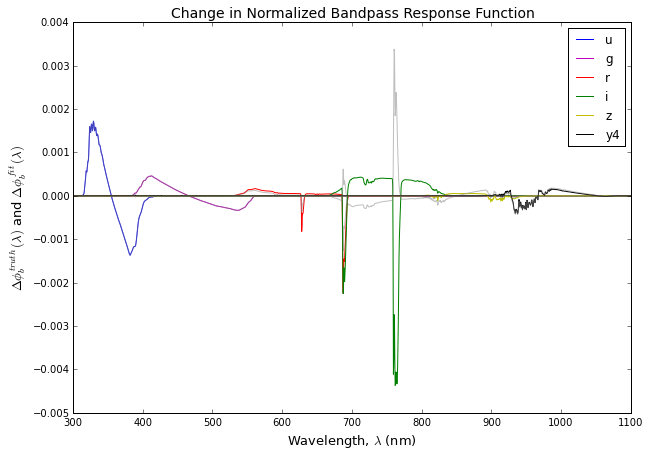

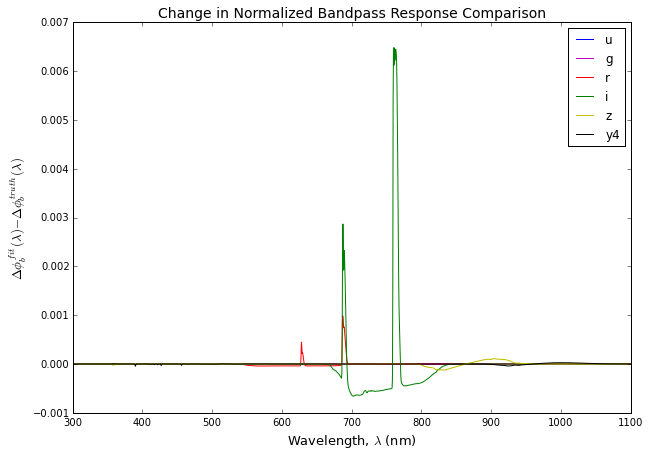

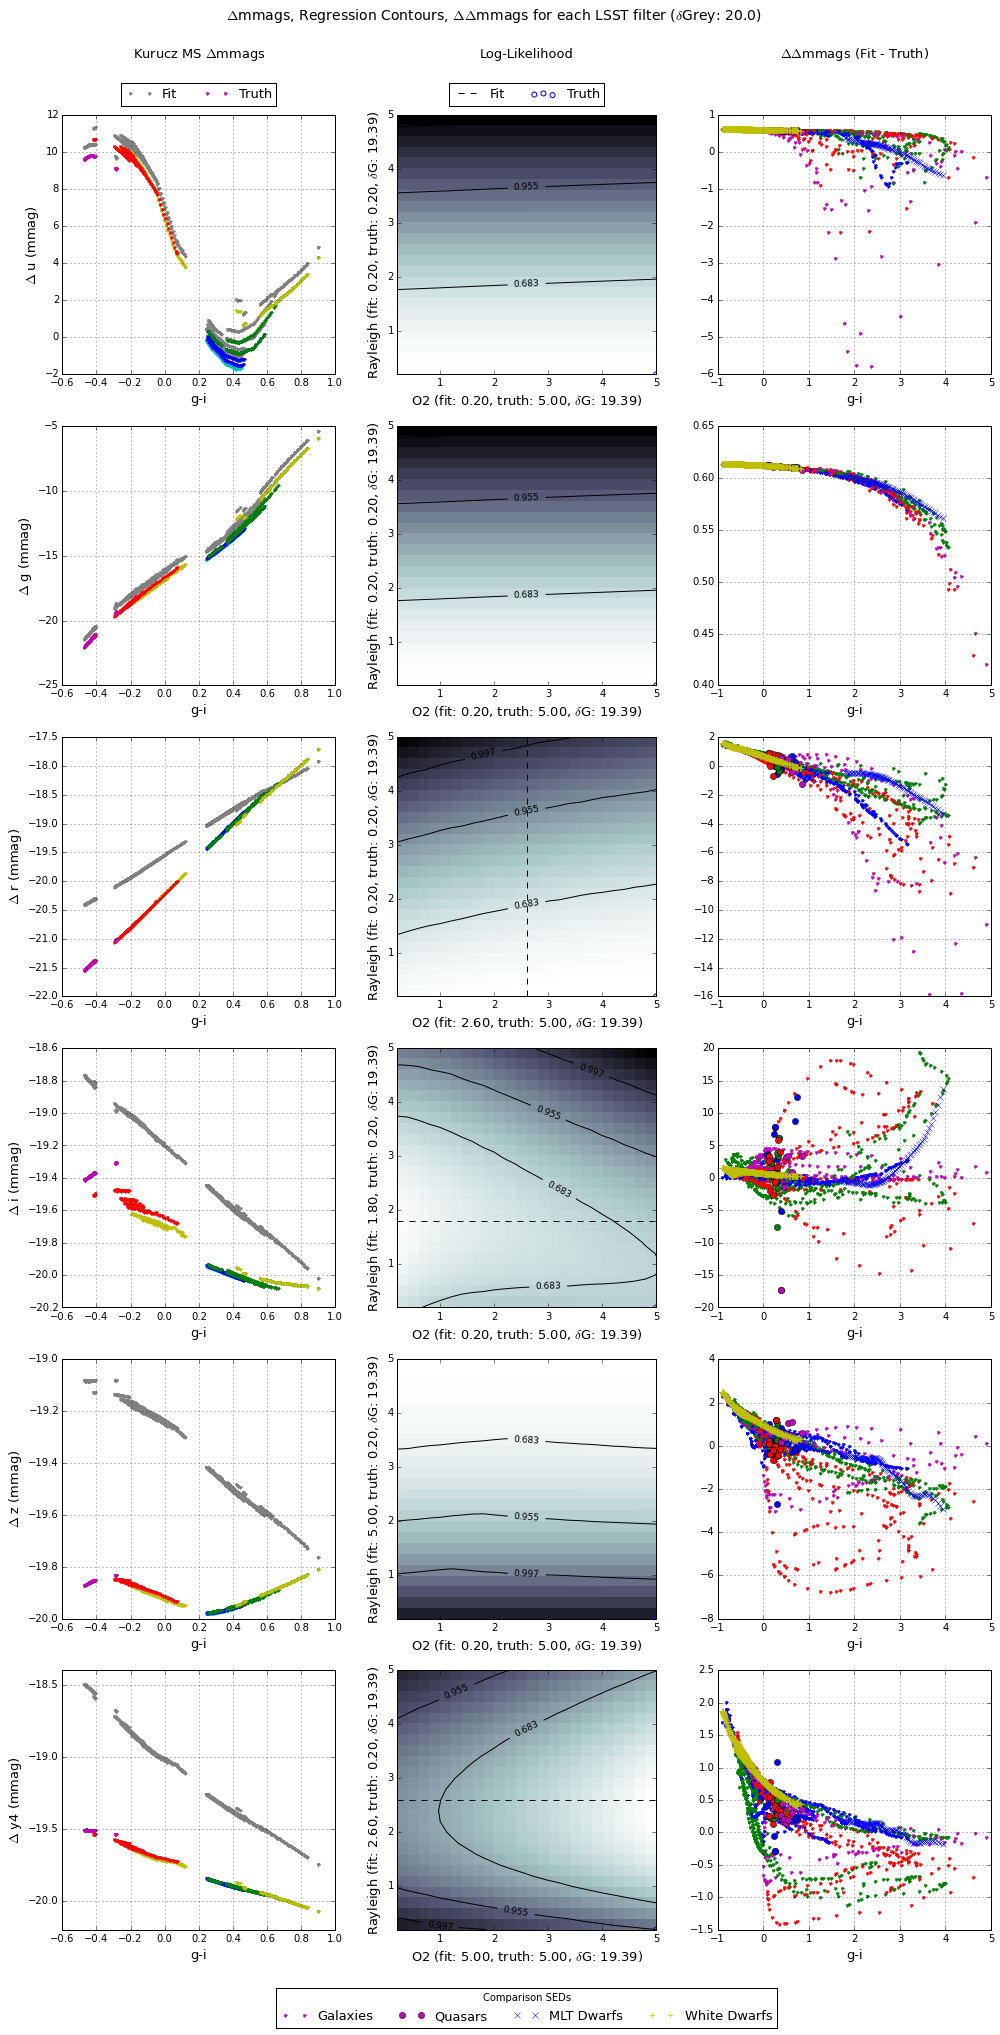

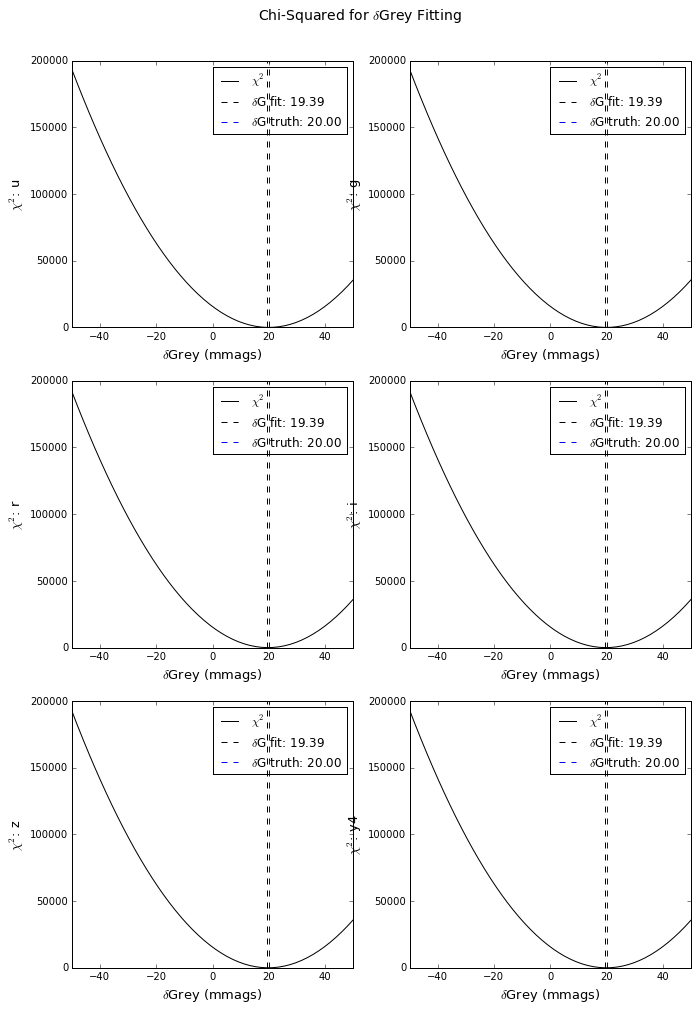

In [5]:
comp1best, comp2best, dgbest, dmagsbest, logL, chisquared, chisquaredbest, dmags_obs, comparison_dmags_fit, comparison_dmags_obs = ab.computeAtmoFit('O2','Rayleigh',atmo_obs,deltaGrey=20.0,componentBins=25,deltaGreyBins=50,pickleString='exp4',dmagLimit=False,plotDifferenceRegression=False,regressionSed='mss',comparisonSeds=['gals','qsos','mlts','wds'],returnData=True)

### Retrieve SED lists:

In [6]:
gals = ab.gals
qsos = ab.qsos
mlts = ab.mlts
wds = ab.wds
mss = ab.mss

In [7]:
throughput_fit = {}

range1, pNum1 = ab._componentCheck('O2',25)
range2, pNum2 = ab._componentCheck('Rayleigh',25)

P_fit = copy.deepcopy(atmo_obs.P)
X_fit = copy.deepcopy(atmo_obs.X)

for f in ab.filterlist:
    P_fit[pNum1] = comp1best[f]
    P_fit[pNum2] = comp2best[f]
    atmo_fit = ab.buildAtmo(P_fit,X_fit)
    throughput_fit[f] = ab.combineThroughputs(atmo_fit,filters=f)[f]
    
throughput_obs = ab.combineThroughputs(atmo_obs)

ddphi = {}
for f in ab.filterlist:
    ddphi[f] = throughput_fit[f].phi - throughput_obs[f].phi

### Create differences for i filter

In [8]:
diff_gals = comparison_dmags_fit['i']['gals']['i'] - comparison_dmags_obs['i']['gals']['i']
diff_qsos = comparison_dmags_fit['i']['qsos']['i'] - comparison_dmags_obs['i']['qsos']['i']
diff_mlts = comparison_dmags_fit['i']['mlts']['i'] - comparison_dmags_obs['i']['mlts']['i']
diff_wds = comparison_dmags_fit['i']['wds']['i'] - comparison_dmags_obs['i']['wds']['i']

In [9]:
diff_limit = 15.0

In [10]:
diff_gals_fail = np.where(diff_gals > diff_limit)
diff_qsos_fail = np.where(diff_qsos > diff_limit) 
diff_mlts_fail = np.where(diff_mlts > diff_limit) 
diff_wds_fail = np.where(diff_wds > diff_limit) 

### Galaxies:

Inst.80E08.002Z.spec.gz_2.5
Const.32E09.04Z.spec.gz_1.0
Burst.20E09.04Z.spec.gz_1.5
Burst.62E09.002Z.spec.gz_3.0
Const.50E08.25Z.spec.gz_0.5
Burst.50E06.25Z.spec.gz_1.0
Const.79E06.25Z.spec.gz_0.5
Inst.12E09.002Z.spec.gz_1.0
Const.25E07.04Z.spec.gz_1.5
Inst.15E06.25Z.spec.gz_0.0
Inst.40E07.002Z.spec.gz_0.5
Burst.10E10.04Z.spec.gz_0.0
Inst.62E09.002Z.spec.gz_2.0
Burst.10E07.002Z.spec.gz_0.0
Const.31E06.002Z.spec.gz_3.0
Const.25E07.002Z.spec.gz_1.0
Const.25E08.04Z.spec.gz_1.5
Inst.25E07.04Z.spec.gz_3.0
Inst.32E07.002Z.spec.gz_0.0
Burst.50E09.25Z.spec.gz_3.0


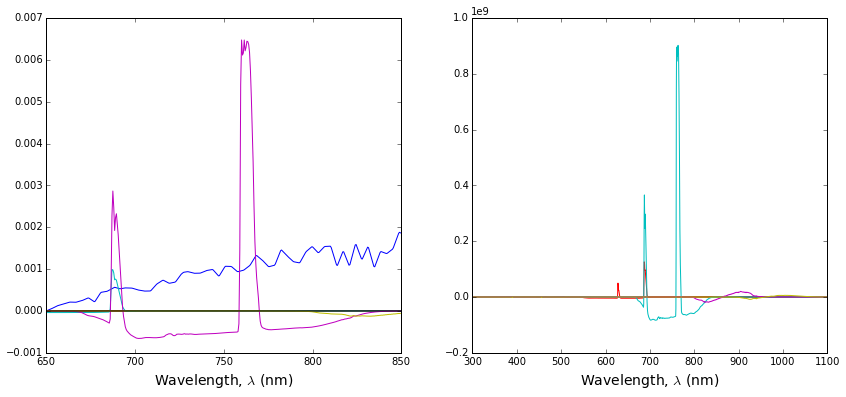

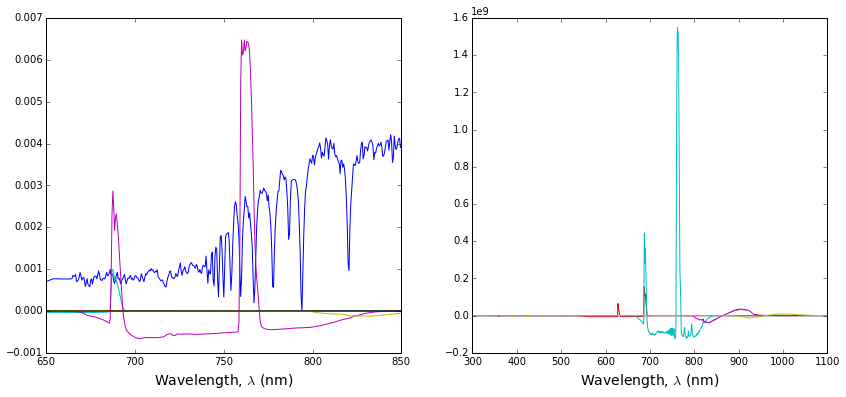

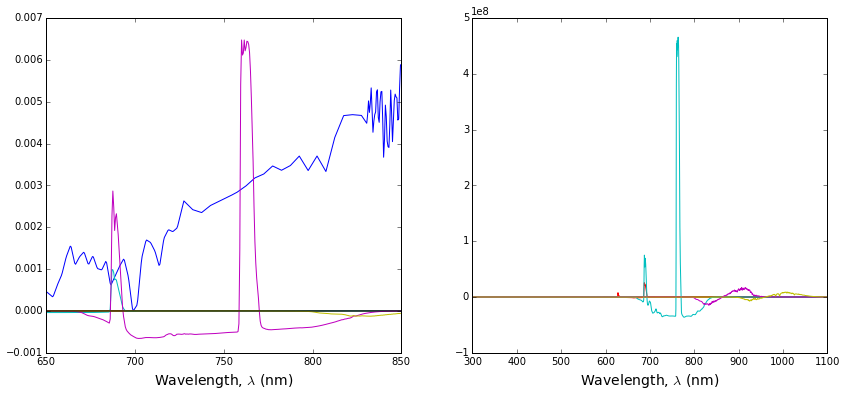

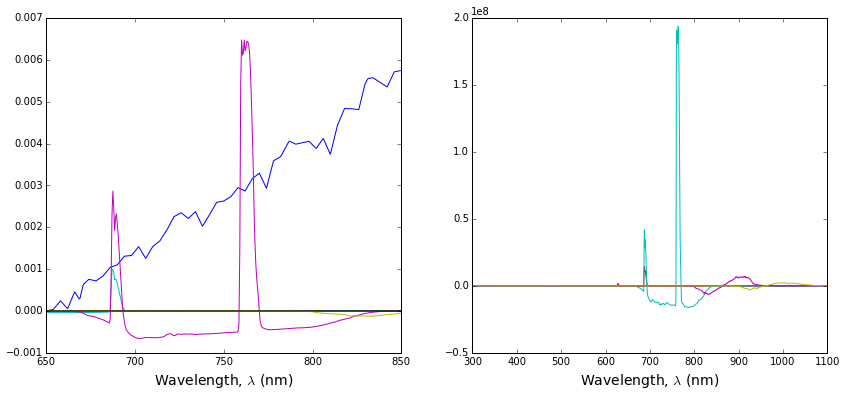

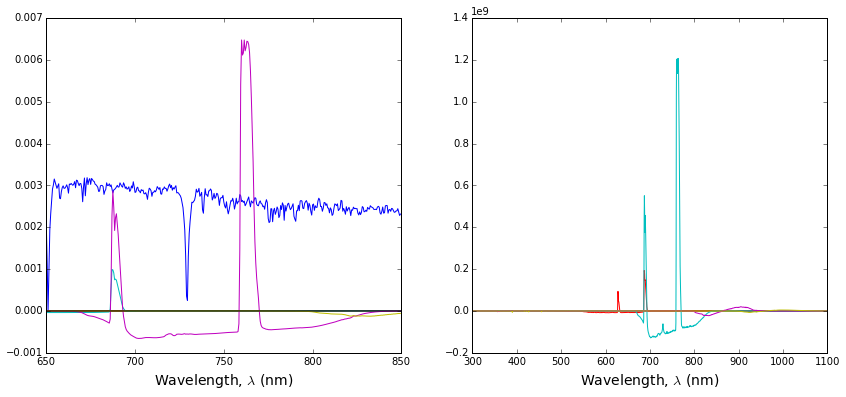

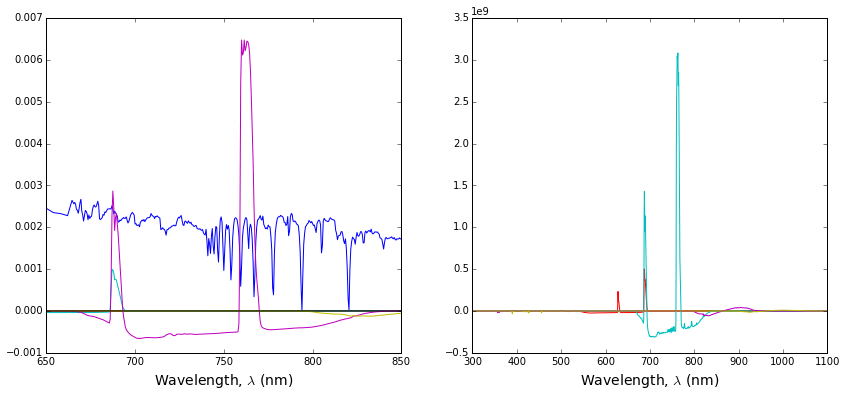

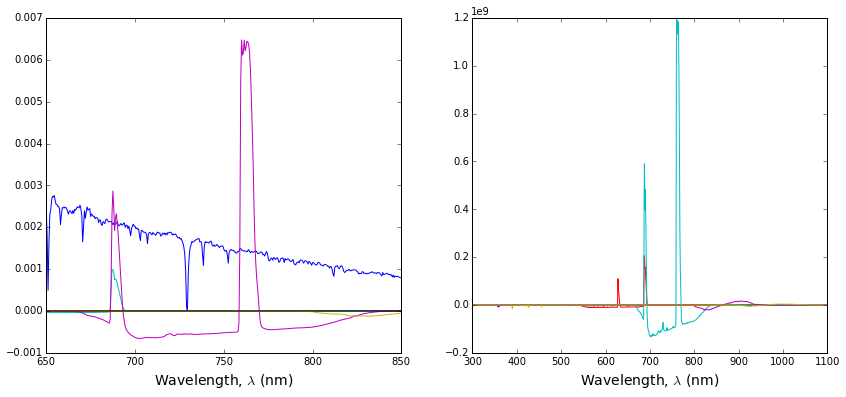

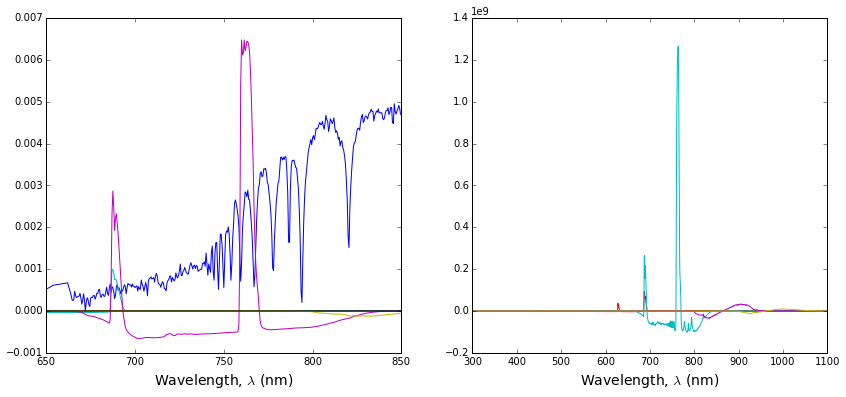

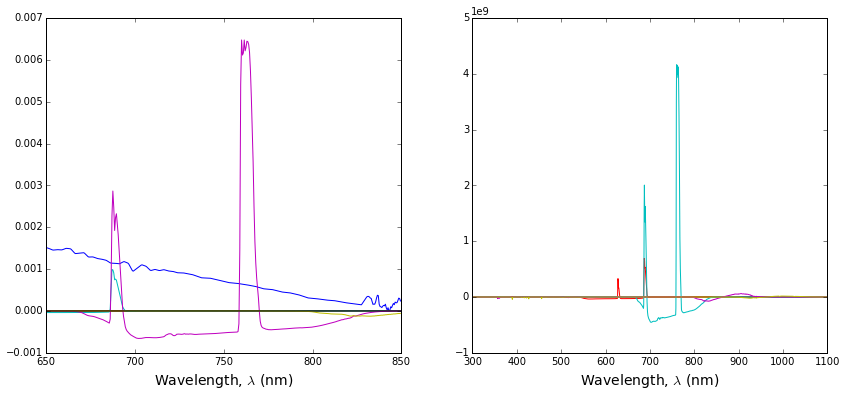

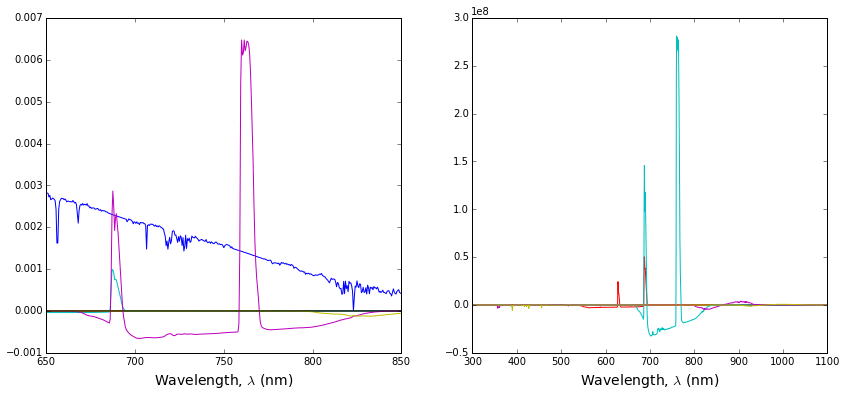

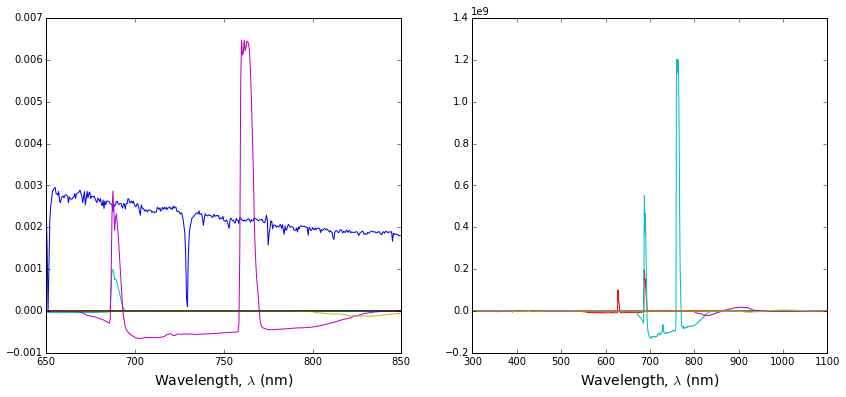

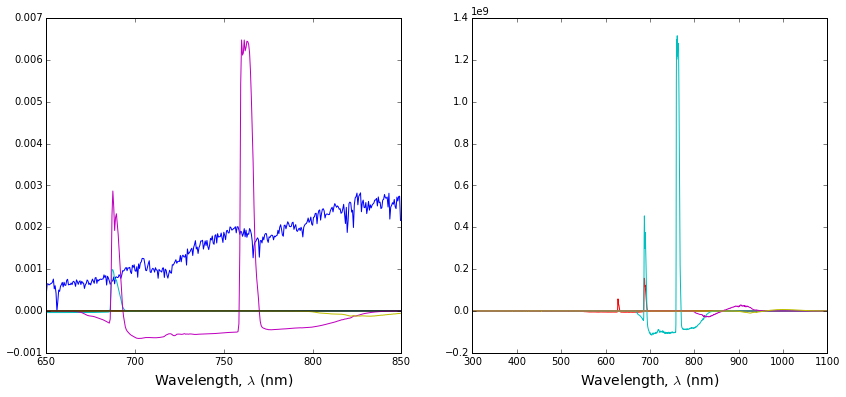

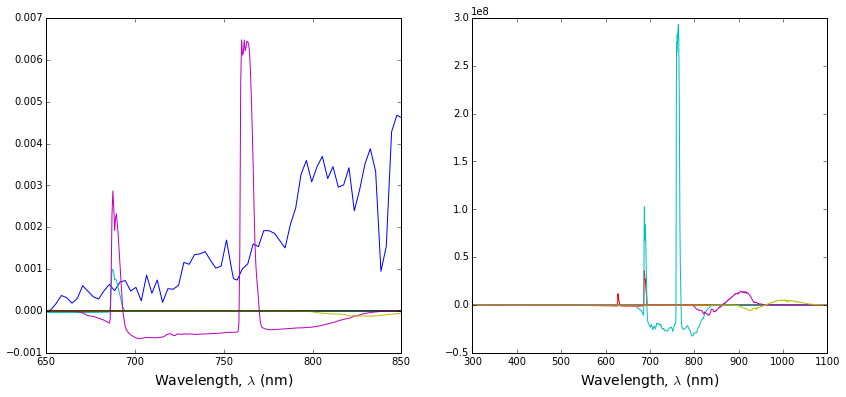

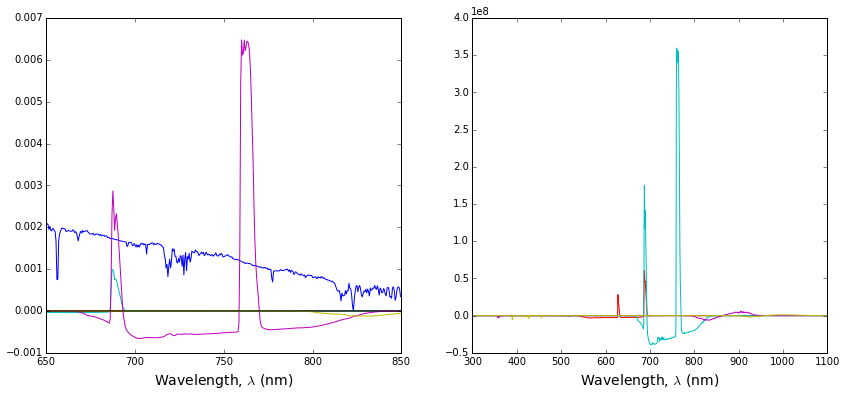

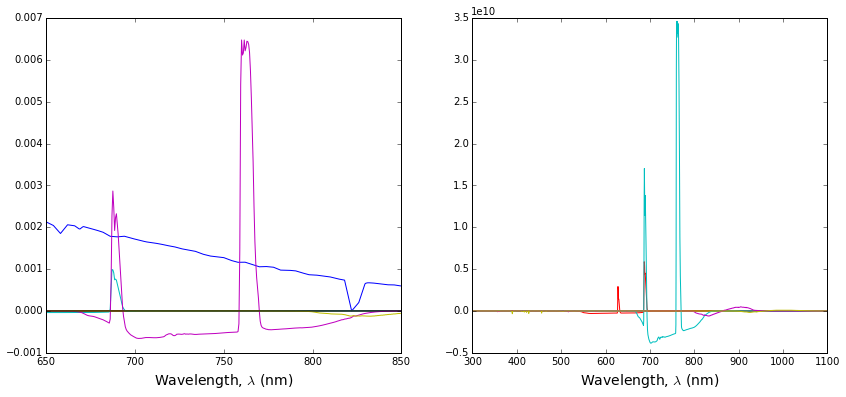

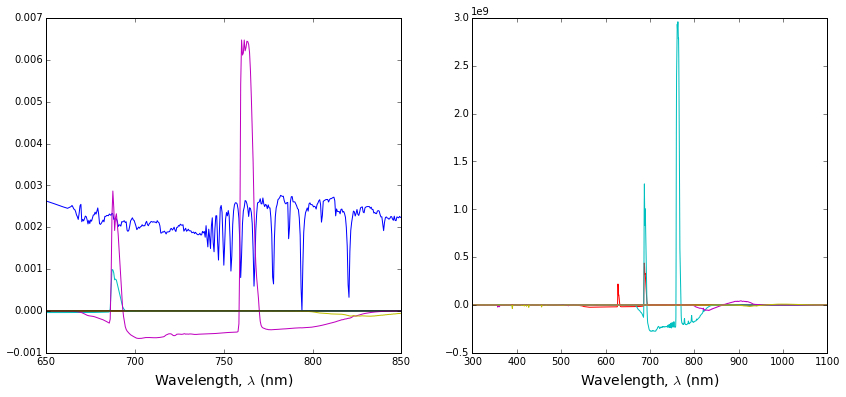

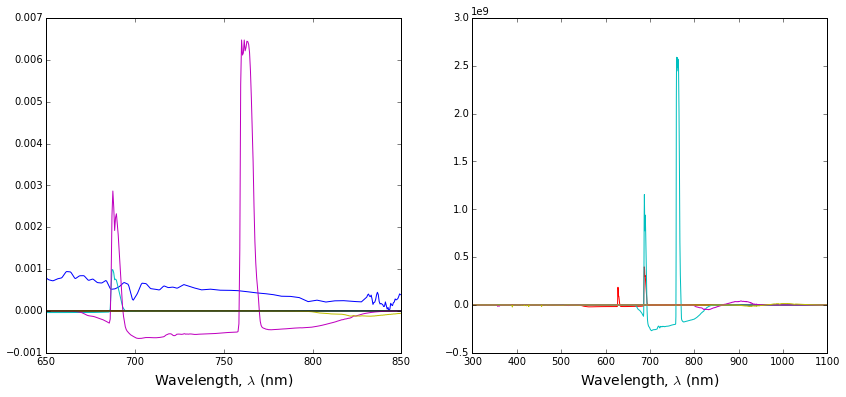

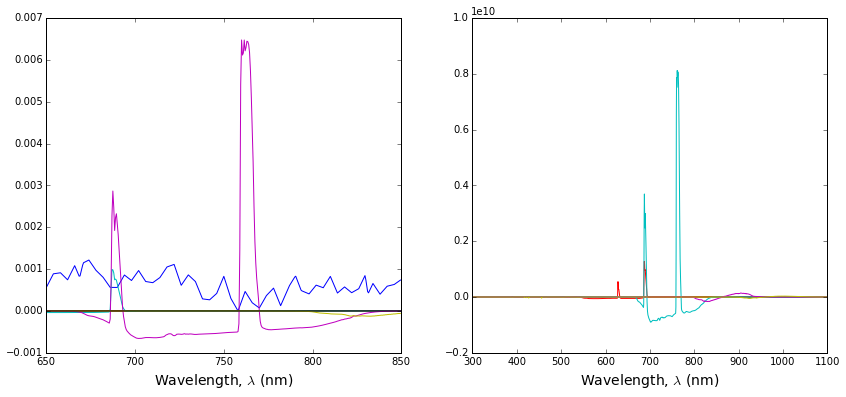

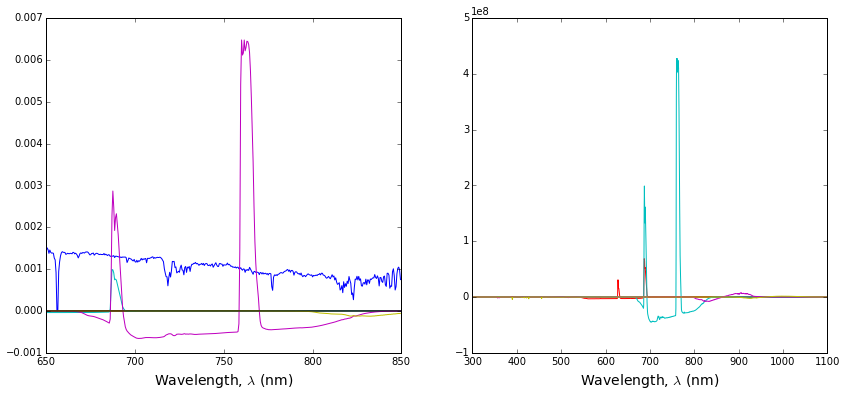

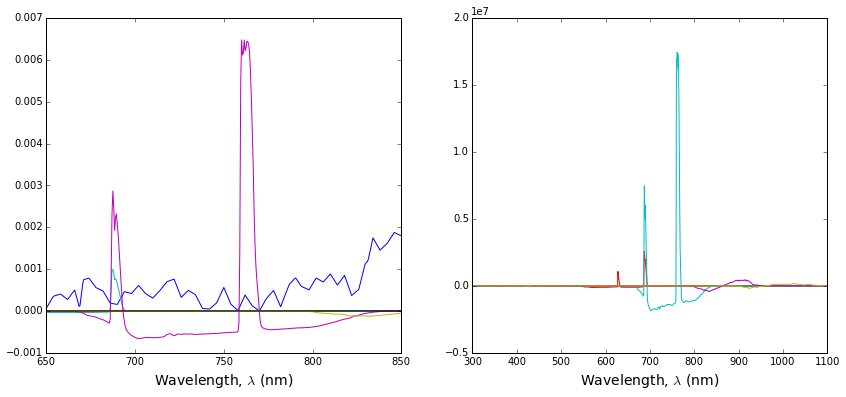

In [11]:
for i,g in enumerate(gals):
    if i in diff_gals_fail[0]:
        print g
        norm = ((gals[g].fnu[700:1100] - min(gals[g].fnu[700:1100])) / max(gals[g].fnu[700:1100])) * max(ddphi['i'])
        
        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(14,6)
        
        ax[0].plot(gals[g].wavelen[700:1100],norm)
        for f in ab.filterlist:
            ax[0].plot(gals[g].wavelen,ddphi[f])
            ax[1].plot(gals[g].wavelen,gals[g].fnu*ddphi[f])
            
        ax[0].set_xlim(650,850)
        ax[0].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[1].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        #ax[0].set_ylabel(r'F($\lambda$)', fontsize=14)
        #ax[1].set_ylabel(r'$F(\lambda$)*($\Delta\phi_b^{obs1-std}(\lambda) - \Delta\phi_b^{obs2-std}(\lambda)$)', fontsize=14)

In [12]:
gals['Const.32E09.04Z.spec.gz_1.0'].wavelen[700:1100]

array([ 650. ,  650.5,  651. ,  651.5,  652. ,  652.5,  653. ,  653.5,
        654. ,  654.5,  655. ,  655.5,  656. ,  656.5,  657. ,  657.5,
        658. ,  658.5,  659. ,  659.5,  660. ,  660.5,  661. ,  661.5,
        662. ,  662.5,  663. ,  663.5,  664. ,  664.5,  665. ,  665.5,
        666. ,  666.5,  667. ,  667.5,  668. ,  668.5,  669. ,  669.5,
        670. ,  670.5,  671. ,  671.5,  672. ,  672.5,  673. ,  673.5,
        674. ,  674.5,  675. ,  675.5,  676. ,  676.5,  677. ,  677.5,
        678. ,  678.5,  679. ,  679.5,  680. ,  680.5,  681. ,  681.5,
        682. ,  682.5,  683. ,  683.5,  684. ,  684.5,  685. ,  685.5,
        686. ,  686.5,  687. ,  687.5,  688. ,  688.5,  689. ,  689.5,
        690. ,  690.5,  691. ,  691.5,  692. ,  692.5,  693. ,  693.5,
        694. ,  694.5,  695. ,  695.5,  696. ,  696.5,  697. ,  697.5,
        698. ,  698.5,  699. ,  699.5,  700. ,  700.5,  701. ,  701.5,
        702. ,  702.5,  703. ,  703.5,  704. ,  704.5,  705. ,  705.5,
      

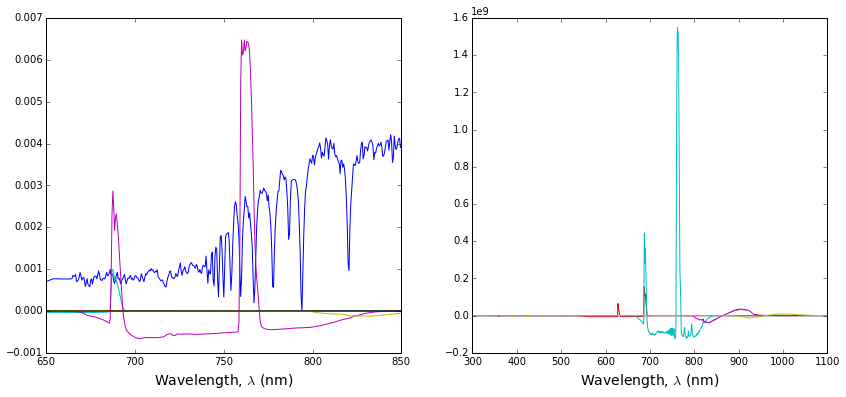

In [13]:
g = 'Const.32E09.04Z.spec.gz_1.0'
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)

norm = ((gals[g].fnu[700:1100] - min(gals[g].fnu[700:1100])) / max(gals[g].fnu[700:1100])) * max(ddphi['i'])

ax[0].plot(gals[g].wavelen[700:1100],norm)
for f in ab.filterlist:
    ax[0].plot(gals[g].wavelen,ddphi[f])
    ax[1].plot(gals[g].wavelen,gals[g].fnu*ddphi[f])

ax[0].set_xlim(650,850)
ax[0].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
ax[1].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
#ax[0].set_ylabel(r'F($\lambda$)', fontsize=14)
#ax[1].set_ylabel(r'$F(\lambda$)*($\Delta\phi_b^{obs1-std}(\lambda) - \Delta\phi_b^{obs2-std}(\lambda)$)', f

### Quasars:

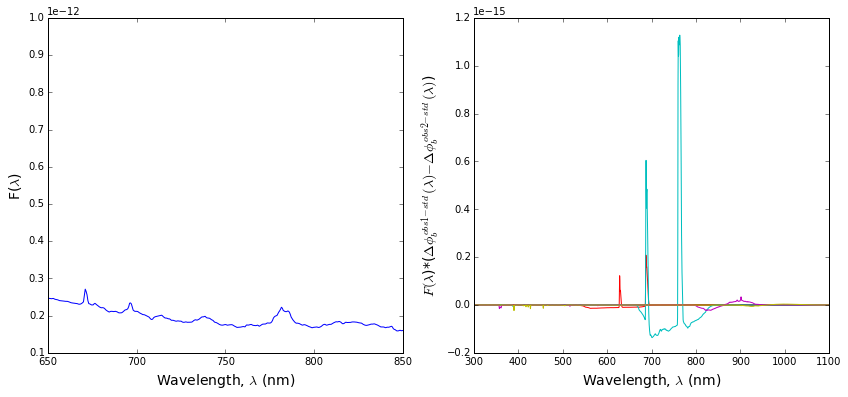

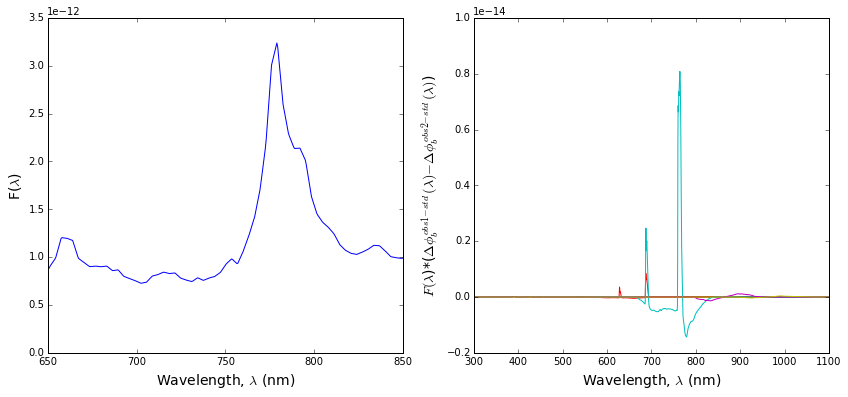

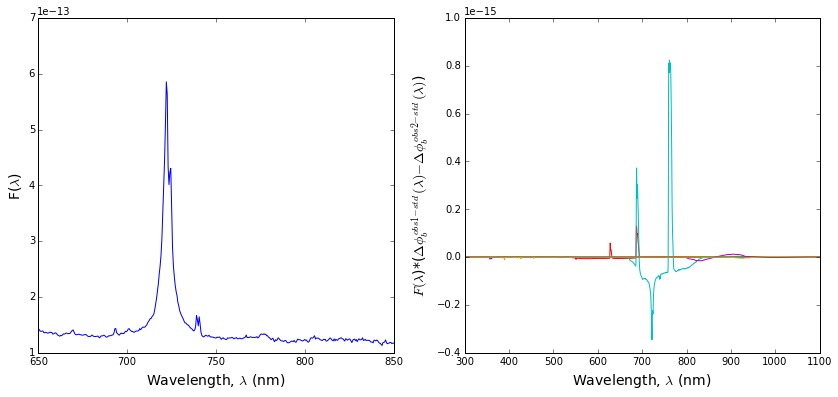

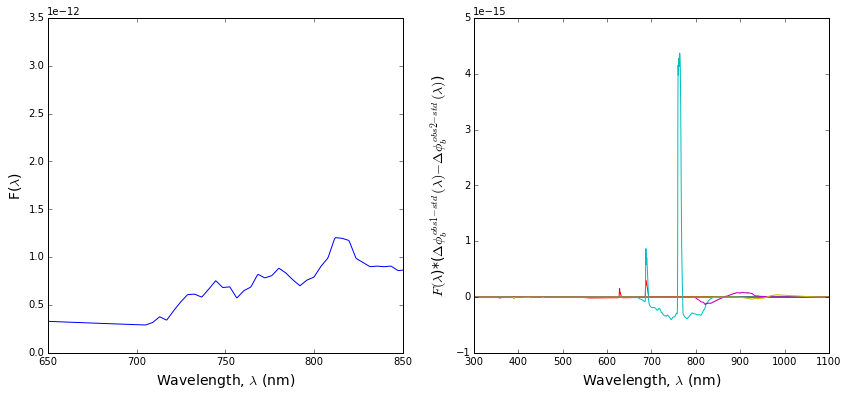

In [14]:
for i,q in enumerate(qsos):
    if i in diff_qsos_fail[0]:
        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(14,6)
        ax[0].plot(qsos[q].wavelen,qsos[q].flambda)
        for f in ab.filterlist:
            ax[1].plot(qsos[q].wavelen,qsos[q].flambda*ddphi[f])
        
        ax[0].set_xlim(650,850)
        ax[0].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[1].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[0].set_ylabel(r'F($\lambda$)', fontsize=14)
        ax[1].set_ylabel(r'$F(\lambda$)*($\Delta\phi_b^{obs1-std}(\lambda) - \Delta\phi_b^{obs2-std}(\lambda)$)', fontsize=14)

### MLTs:

In [15]:
for i,s in enumerate(mlts):
    if i in diff_mlts_fail[0]:
        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(14,6)
        ax[0].plot(mlts[s].wavelen,mlts[s].flambda)
        for f in ab.filterlist:
            ax[1].plot(mlts[s].wavelen,mlts[s].flambda*ddphi[f])
        
        ax[0].set_xlim(650,850)
        ax[0].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[1].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[0].set_ylabel(r'F($\lambda$)', fontsize=14)
        ax[1].set_ylabel(r'$F(\lambda$)*($\Delta\phi_b^{obs1-std}(\lambda) - \Delta\phi_b^{obs2-std}(\lambda)$)', fontsize=14)

### WDs:

In [16]:
for i,s in enumerate(wds):
    if i in diff_wds_fail[0]:
        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(14,6)
        ax[0].plot(wds[s].wavelen,wds[s].flambda)
        for f in ab.filterlist:
            ax[1].plot(wds[s].wavelen,wds[s].flambda*ddphi[f])
            
        ax[0].set_xlim(650,850)
        ax[0].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[1].set_xlabel(r'Wavelength, $\lambda$ (nm)', fontsize=14)
        ax[0].set_ylabel(r'F($\lambda$)', fontsize=14)
        ax[1].set_ylabel(r'$F(\lambda$)*($\Delta\phi_b^{obs1-std}(\lambda) - \Delta\phi_b^{obs2-std}(\lambda)$)', fontsize=14)

### Galaxies as Regression SEDs (dmmags column 1):

Computing nonlinear regression for O2 and Rayleigh.
Observed atmosphere parameters: [1.0, 5.0, 1.0, 0.2, 1.0, 1.7]
Observed atmosphere airmass:    1.5
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for O2: 5.0
Observed atmosphere parameter for Rayleigh: 0.2

Fitting for O2 between 0.20 and 5.00 in 25 bins.
Fitting for Rayleigh between 0.20 and 5.00 in 25 bins.

Non-zero deltaGrey detected.
Fitting for deltaGrey between -50.00 and 50.00 mmags in 50 bins.

Regressing 31250 parameter combinations per filter...

Calculating best fit parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X15_P105010021017_O2_Rayleigh_XSTD12_DG200_DGR-5050_E5_gals_u_50dgb_25b_exp4.pkl'
Saved LogL at best fit deltaGrey for u filter.
Saved Chi-Squared at best fit deltaGrey for u filter.
Completed u filter.

Calculating best fit parameters for g filter...
@pickle_results: using precomputed results from

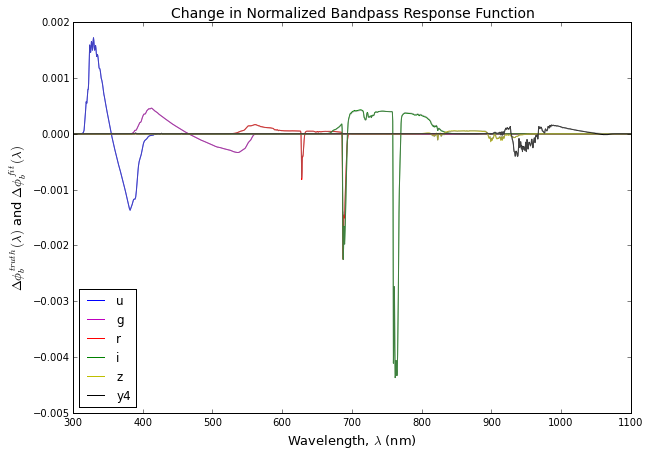

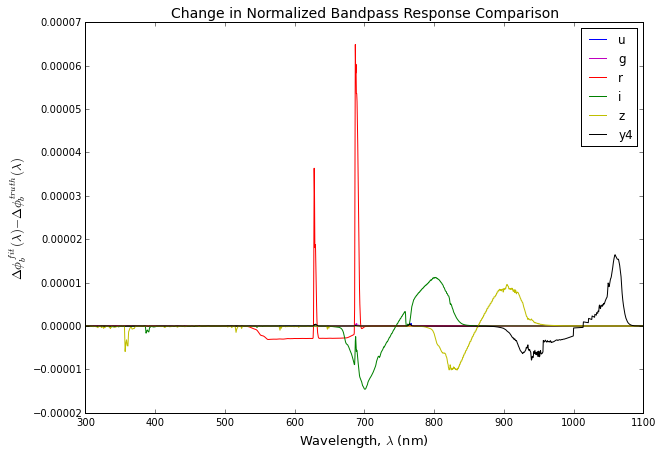

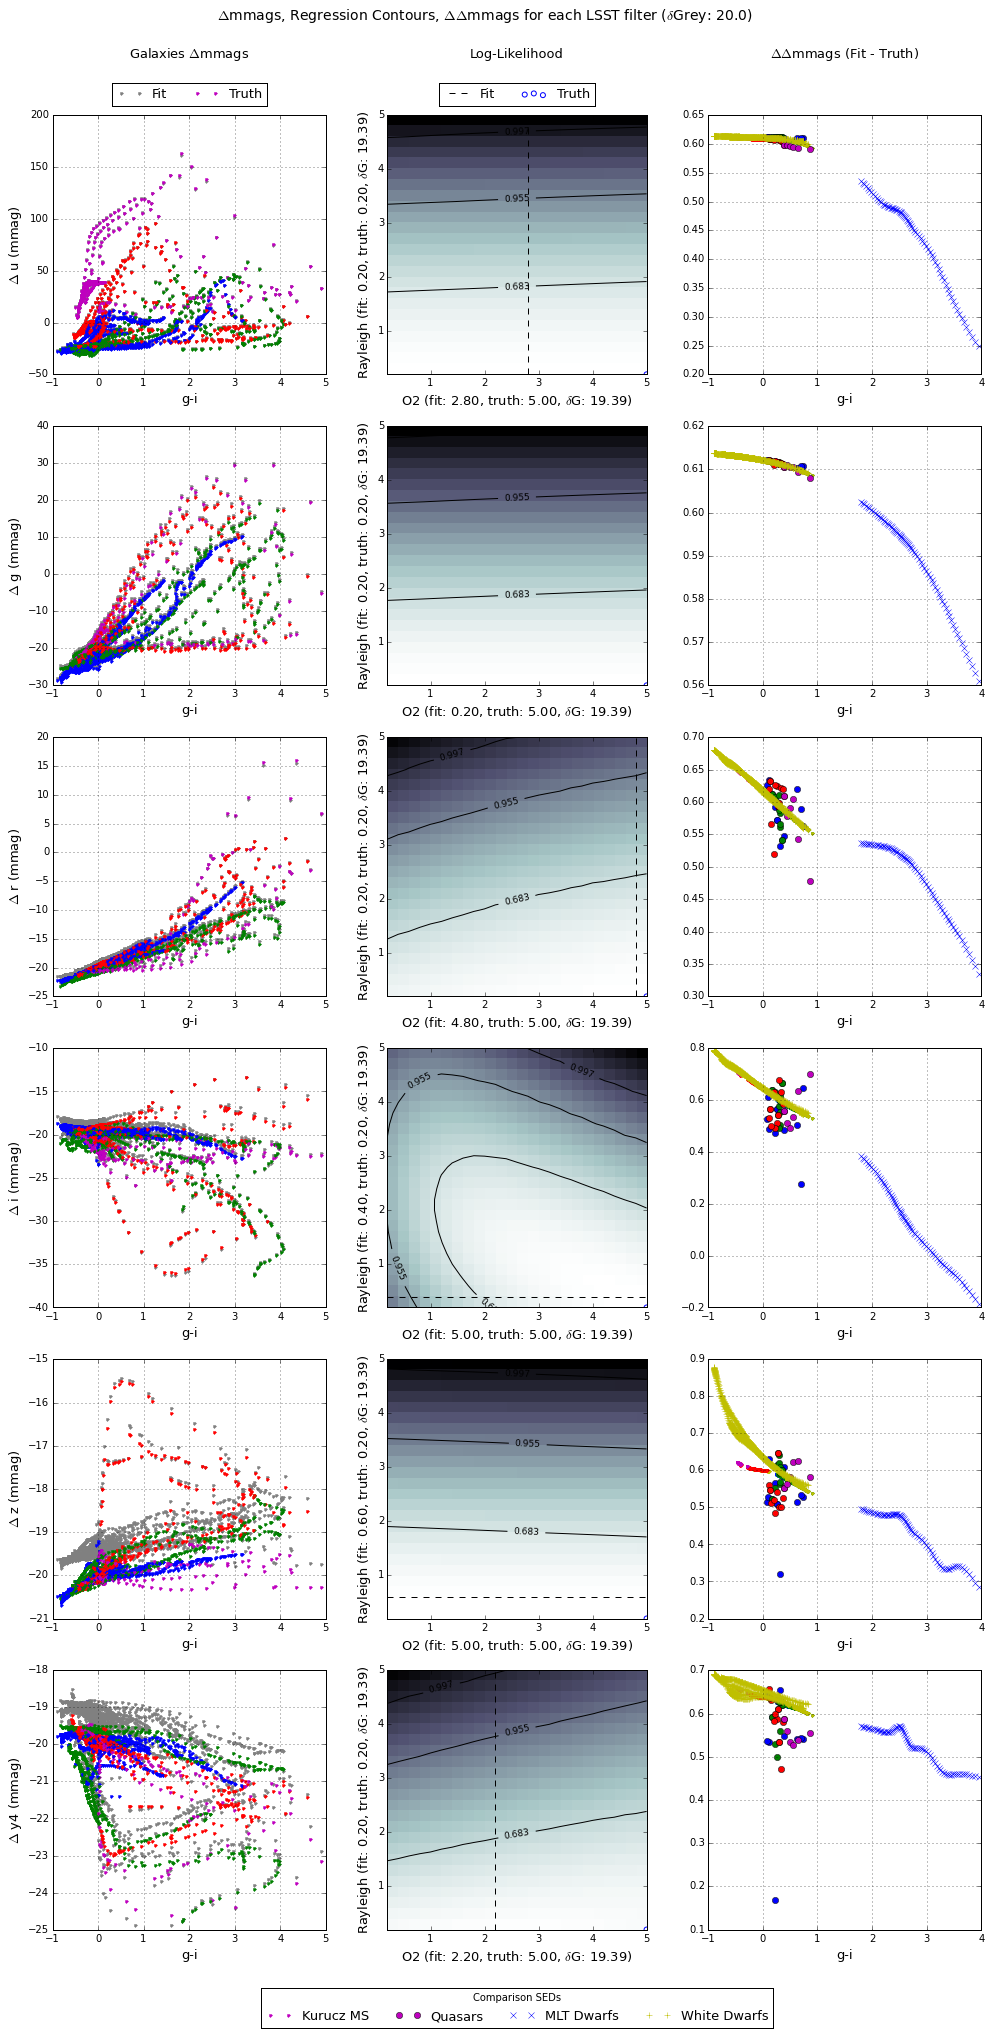

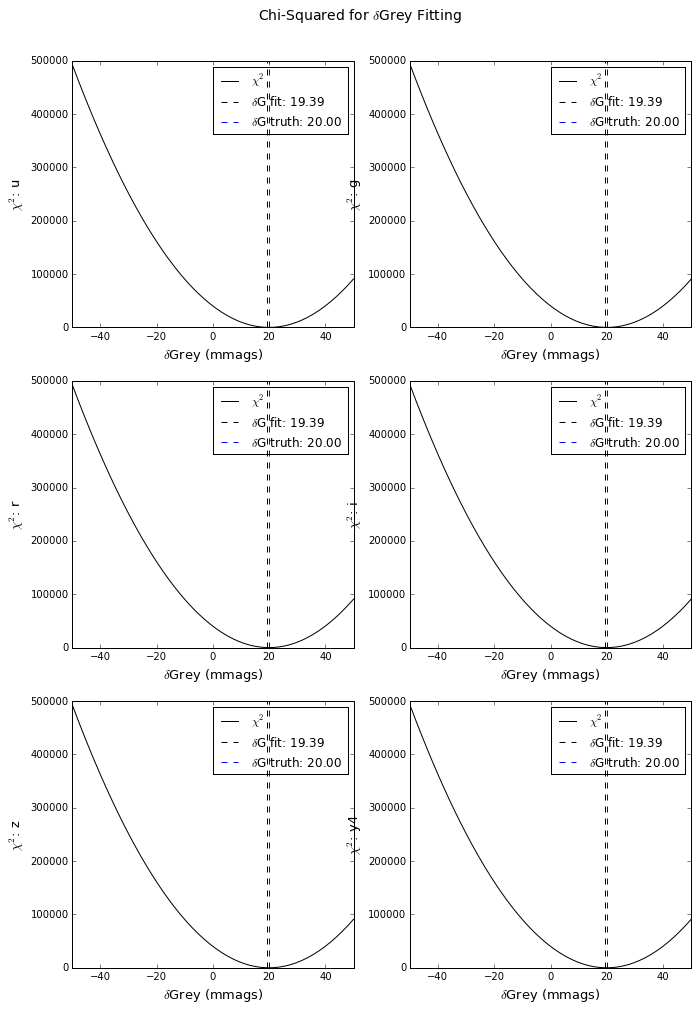

In [17]:
ab.computeAtmoFit('O2','Rayleigh',atmo_obs,deltaGrey=20.0,componentBins=25,deltaGreyBins=50,pickleString='exp4',dmagLimit=False,plotDifferenceRegression=False,regressionSed='gals',comparisonSeds=['mss','qsos','mlts','wds'])